In [0]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
from scipy.stats.distributions import norm
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

## Defining the differential equation as a function

We will define the differential equation

$$ \frac{dS_t}{dt} =    - \beta S I          $$
$$ \frac{dI_t}{dt} =    \beta S I - \gamma I $$
$$ \frac{dR_t}{dt} =    \gamma I             $$

as a Python function:

In [2]:
def deriv(t, y, R0_mu, R0_sigma, tau_mu, tau_sigma):
    S, I, R = y

    gamma = 1 / norm.rvs(tau_mu, tau_sigma)
    beta = norm.rvs(R0_mu, R0_sigma) * gamma

    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
S_0 = 1.0
I_0 = 0.0001
R_0 = 0.0

y_0 = (S_0, I_0, R_0)

R0_mu = 4.08
R0_sigma = 3.85
tau_mu = 8
tau_sigma = 1.5

In [4]:
res = solve_ivp(fun=deriv, t_span = (0, 100), y0=y_0, args=(R0_mu, R0_sigma, tau_mu, tau_sigma), max_step=1)

<ipython-input-5-671ddad271a5>:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


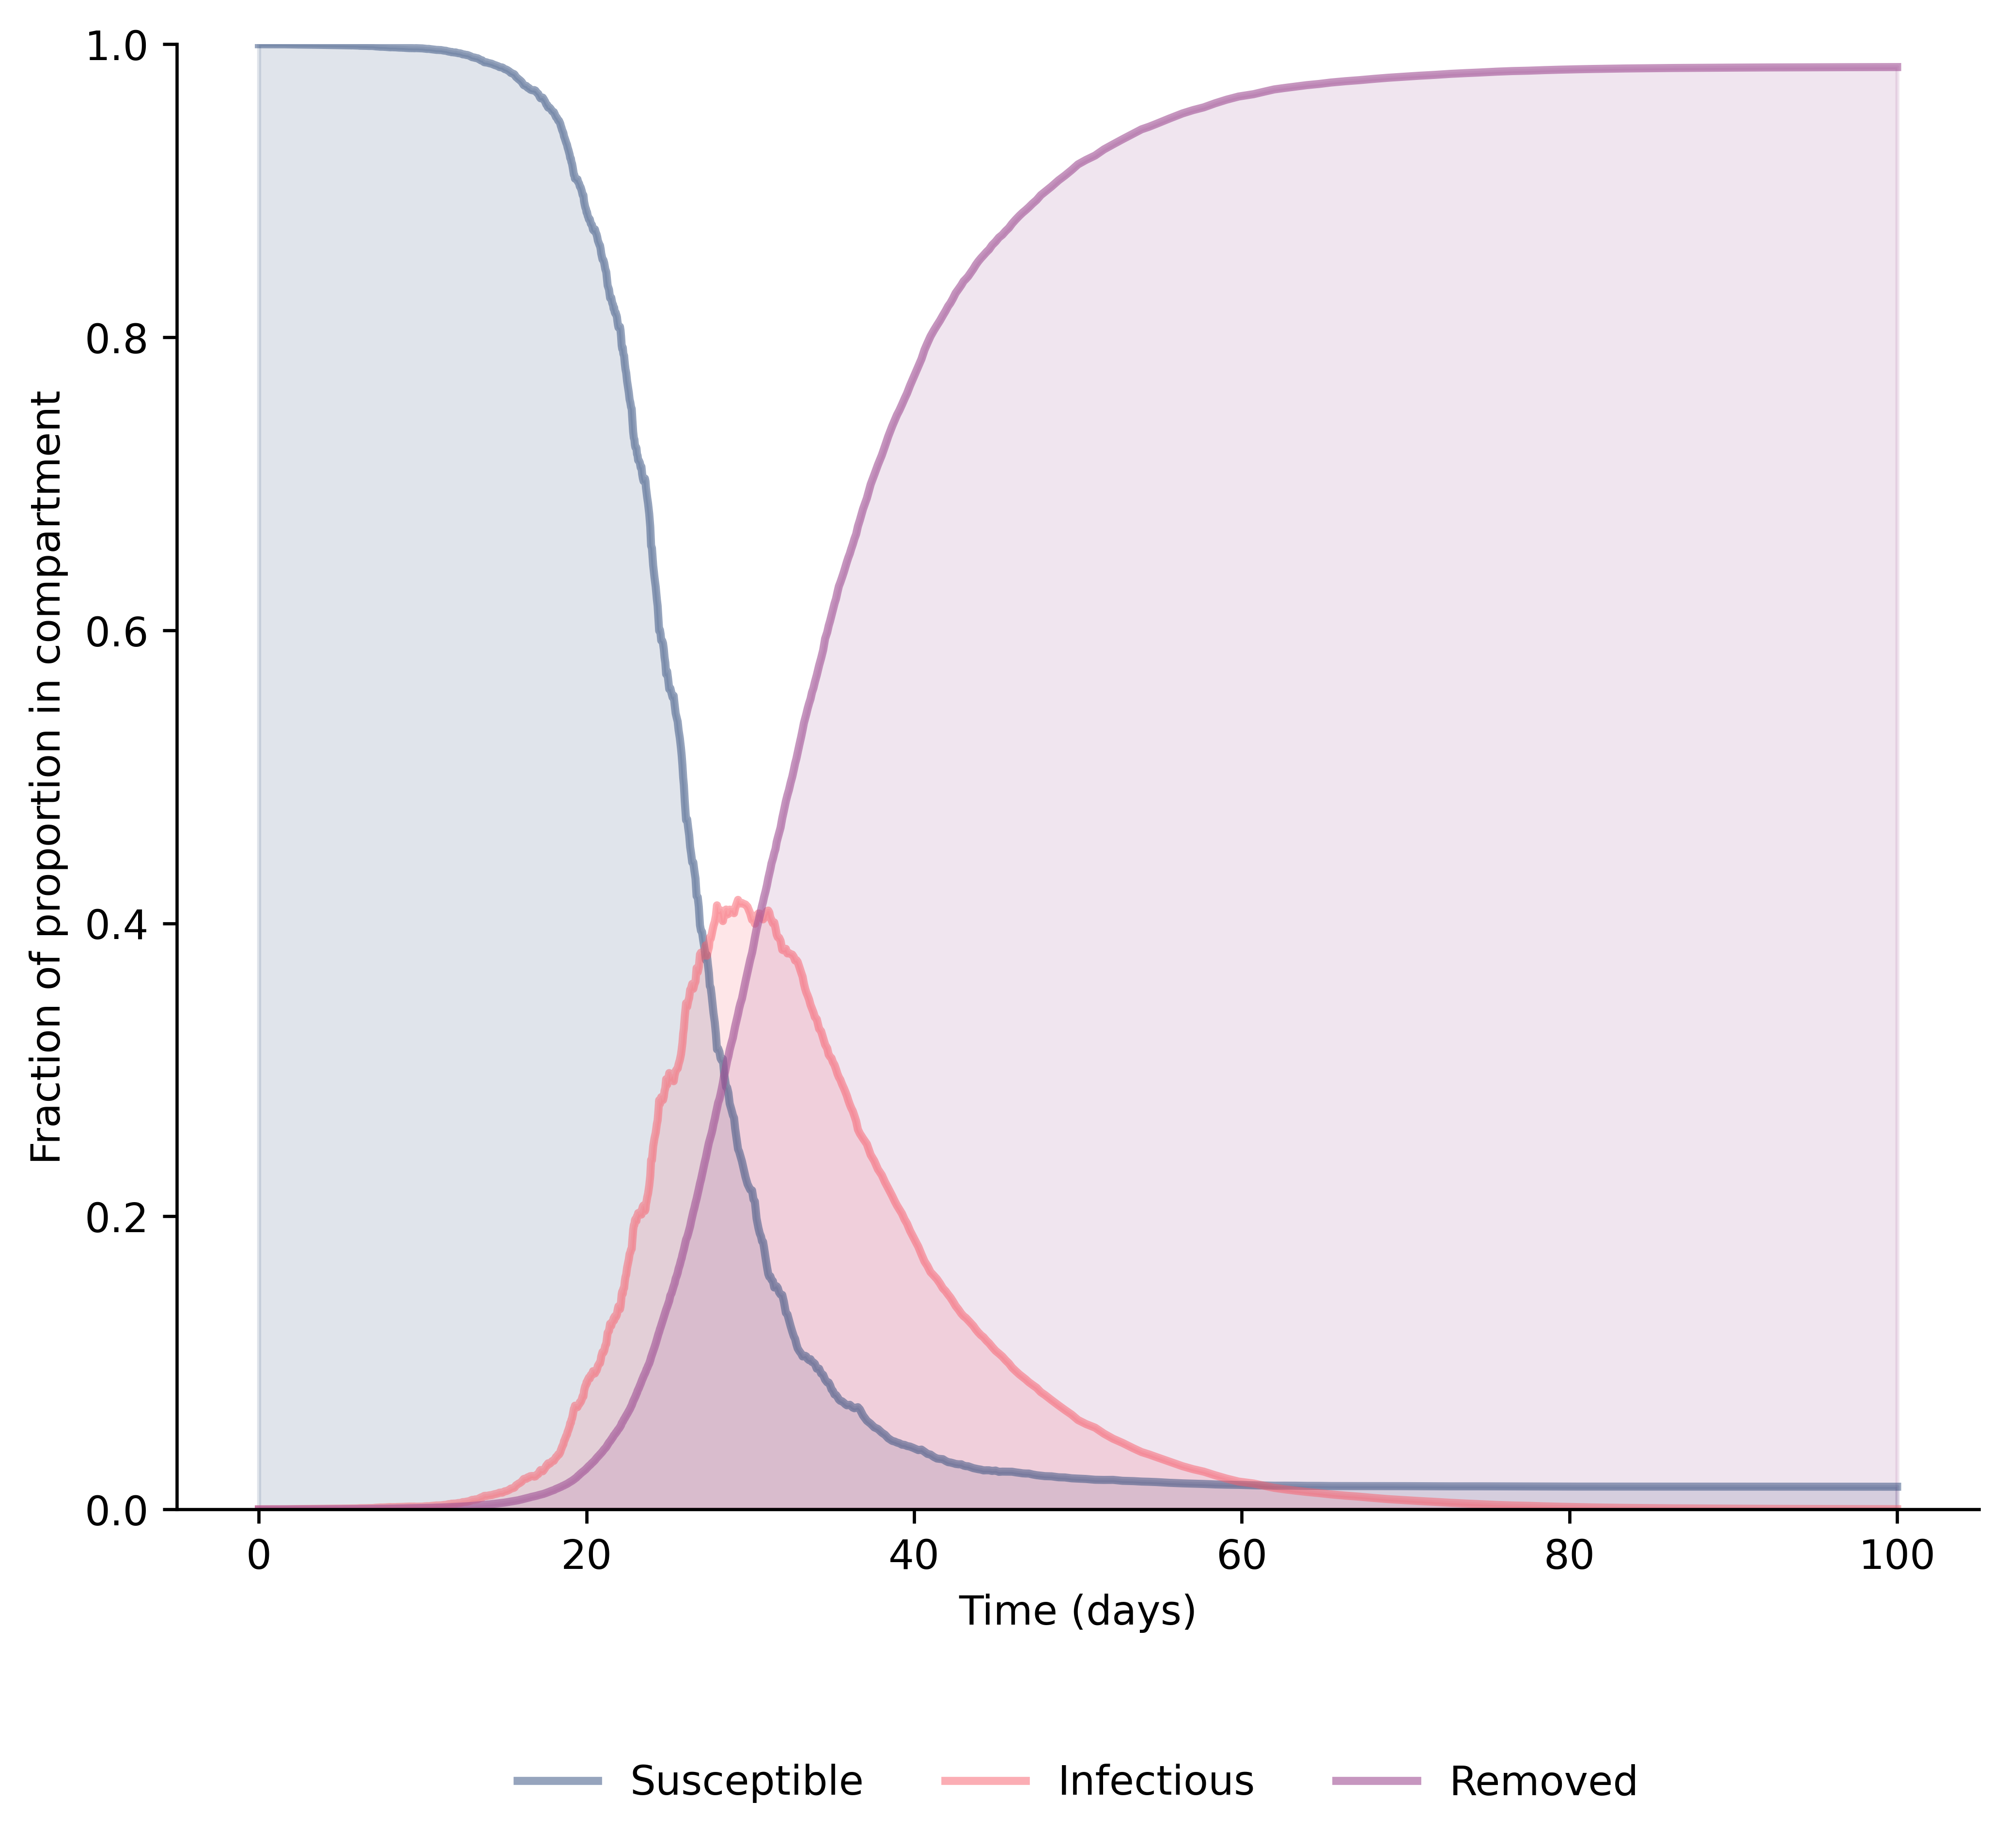

In [5]:
S, I, R = res.y


fig = plt.figure(facecolor="w", figsize=(8, 8), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(res.t, S, color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")
ax.plot(res.t, I, color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")
ax.plot(res.t, R, color=COLORS["R"], alpha = 0.6, lw=2, label="Removed")

ax.fill_between(res.t, 0, S, color=COLORS["S"], alpha=0.15)
ax.fill_between(res.t, 0, I, color=COLORS["I"], alpha=0.15)
ax.fill_between(res.t, 0, R, color=COLORS["R"], alpha=0.15)

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_ylim(0, 1.0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.225), loc="lower center", ncol=3, frameon=False)

fig.subplots_adjust(bottom=0.25)

plt.savefig("sir_integral_stochastic.pdf")
plt.show()

## Multiple iterative runs

In [6]:
def run_iteratively(iterations=15):
    return [solve_ivp(fun=deriv, 
                      t_span = (0, 100), 
                      y0=y_0, 
                      args=(R0_mu, R0_sigma, tau_mu, tau_sigma), 
                      max_step=1) for i in range(iterations)]

In [7]:
res = run_iteratively()

In [8]:
res[0].t

<ipython-input-9-8da7bfd5ed77>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


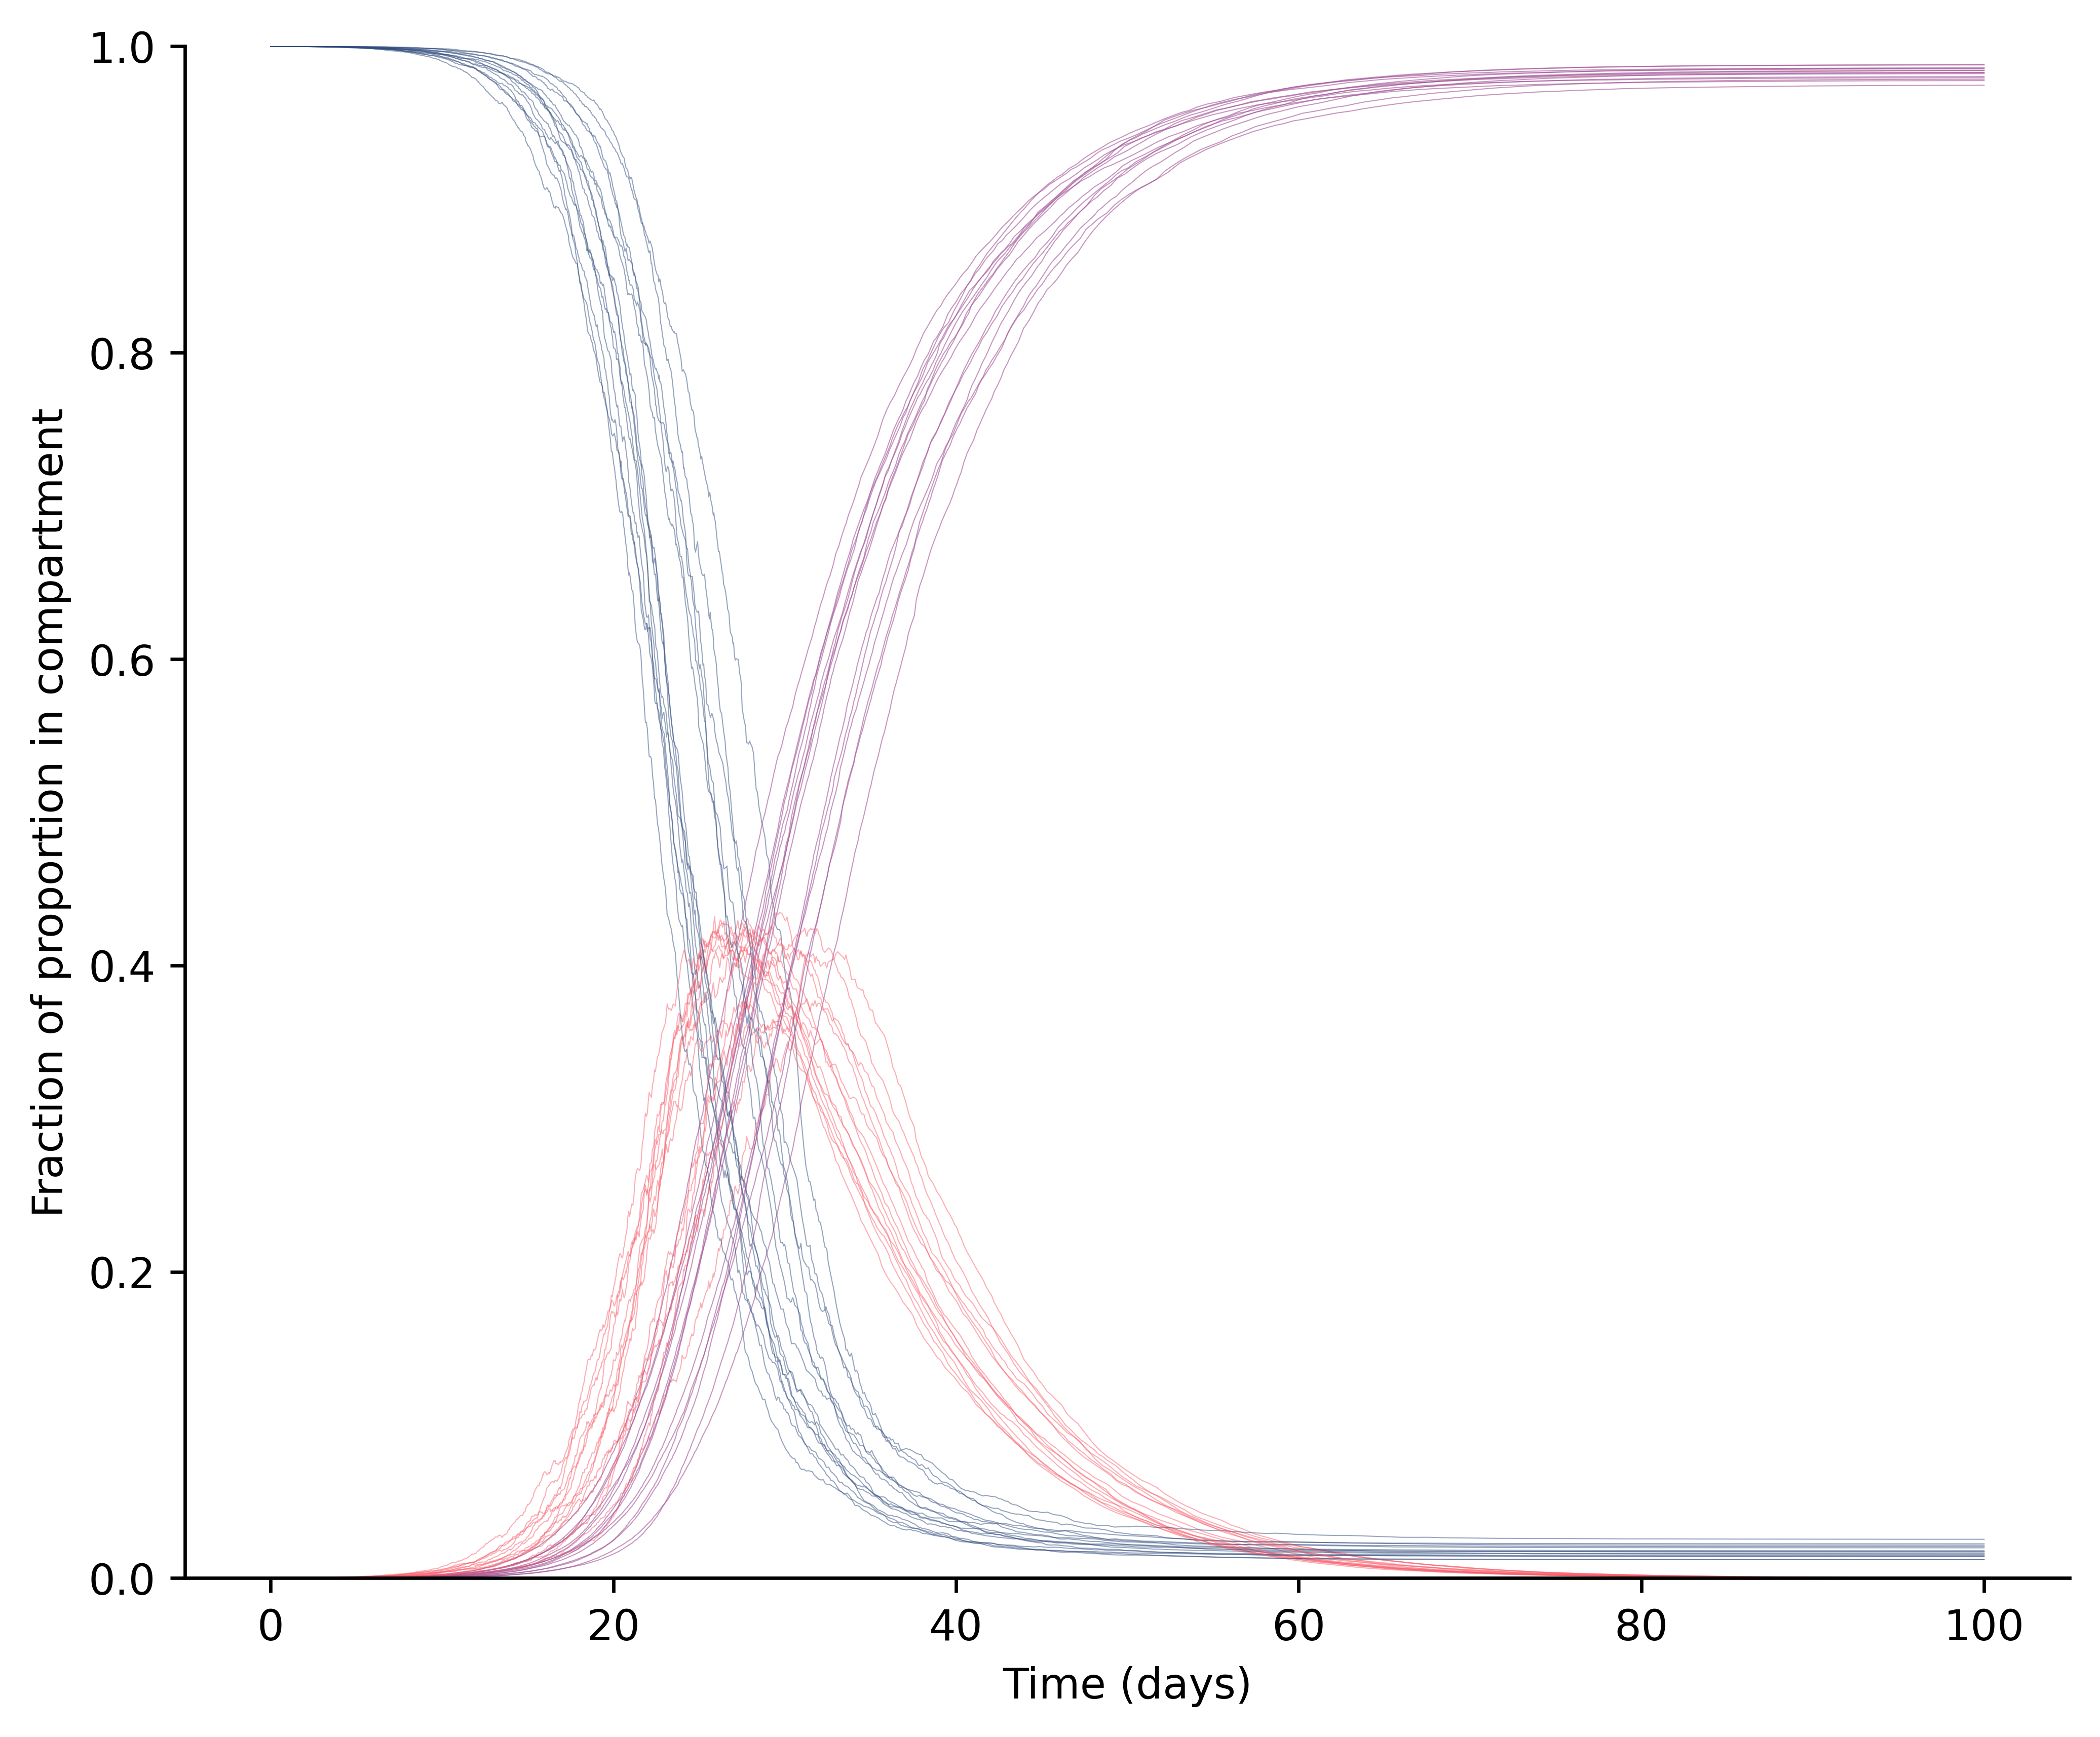

In [9]:

fig = plt.figure(facecolor="w", figsize=(8, 8), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

for each in res:
    ax.plot(each.t, each.y[0], color=COLORS["S"], alpha=0.5, lw=0.25, label="Susceptible")
    ax.plot(each.t, each.y[1], color=COLORS["I"], alpha=0.5, lw=0.25, label="Infectious")
    ax.plot(each.t, each.y[2], color=COLORS["R"], alpha = 0.6, lw=0.25, label="Removed")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_ylim(0, 1.0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

fig.subplots_adjust(bottom=0.25)

plt.savefig("sir_integral_stochastic_multirun.pdf")
plt.show()